<a href="https://colab.research.google.com/github/rajibbanerjee/MachineLearningTechnique/blob/main/LossSurface.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Plotting the Loss Surface

In [7]:
from sklearn.datasets import load_wine
import numpy as np
from sklearn.preprocessing import StandardScaler
from mpl_toolkits import mplot3d
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt


###Loading Data

In [8]:

data, label = load_wine(as_frame=True, return_X_y=True)
data = data.drop(['ash', 'alcalinity_of_ash', 'magnesium',
       'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue',
       'od280/od315_of_diluted_wines', 'proline'], axis=1)

### Transforming Data

In [9]:
scaler = StandardScaler()
X = scaler.fit_transform(data)
y = np.array(label)

### Define MSE loss

In [10]:
def loss(X, y, w):
  y_hat = np.dot(X, w)
  delta = y_hat - y
  return np.dot(delta, delta)/len(y)

### Generating the $w_1, w_2$ surface data

In [11]:
w1 = np.linspace(-1, 1, 100)
w2 = np.linspace(-1, 1, 100)
W_1, W_2 = np.meshgrid(w1, w2)
print(w1.shape)
print(w2.shape)

(100,)
(100,)


### Generating the loss data for the $w_1, w_2$ surface

In [12]:
L= []   # Loss data for all w_1, w_2 combination 
for i in w1:
  loss_val = []
  for j in w2:
    w = np.array([i, j])
    loss_val.append(loss(X, y, w))
  #print(loss_val)
  L.append(np.array(loss_val))

L = np.array(L)
L.shape

(100, 100)

### Plotting

Text(0.5, 0, 'Loss')

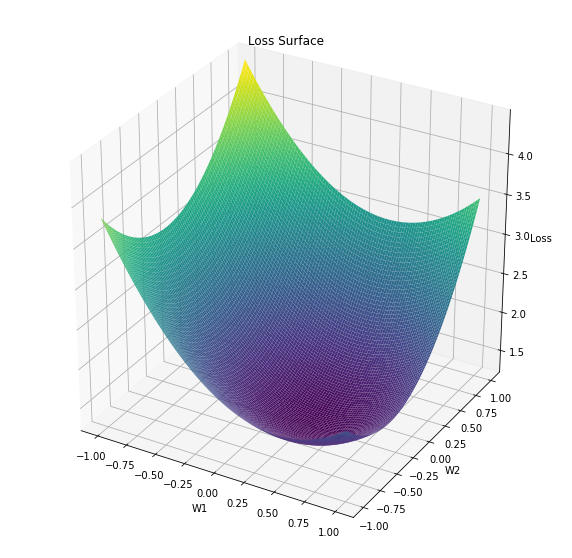

In [13]:

fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d')
ax.plot_surface(W_1, W_2, np.array(L), rstride=1, cstride=1,
                cmap='viridis', edgecolor='none')
ax.set_title('Loss Surface')
ax.set_xlabel('W1')
ax.set_ylabel('W2')
ax.set_zlabel('Loss')